# Create the Elephant Curve

Create your own "elephant chart" of the percentage change of income, measured over percentiles of the world population ranked by income.

The data is available as the [Lakner-Milanovic 2013 World Panel Income Distribution (LM-WPID)](http://www.worldbank.org/en/research/brief/World-Panel-Income-Distribution). This database measures the annual income of an individual across several dimensions including country and income decile group. First we'll load pyplot from matplotlib to plot the data, and then pandas to wrangle the data...

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

We'll be using the Pandas python library, and you can find the documentation for Pandas at this link.

https://pandas.pydata.org/docs/

The documentation includes the following useful tutorials.

* [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html)

* [Essential basic functionality](https://pandas.pydata.org/docs/user_guide/basics.html)

In [2]:
import pandas as pd
pd.__version__

'1.0.3'

Now we can load the world panel income distribution database from a local copy of this [csv file](http://pubdocs.worldbank.org/en/972401475765303436/LM-WPID-web.csv).

In [3]:
lmwpid = pd.read_csv('LMWPIDweb.csv')

In [4]:
lmwpid

,contcod,country,region,year,inc_con,source,mysample,bin_year,group,pop,RRinc,RRmean,cons_2005ppp_pc,gdp_2005ppp_pc,totpop
0,AGO,Angola,Sub-Saharan Africa,1995,C,wyd,1,1993,1,1.137175,174.0,806,NaN,2090.259277,11.371750
1,AGO,Angola,Sub-Saharan Africa,1995,C,wyd,1,1993,2,1.137175,287.0,806,NaN,2090.259277,11.371750
2,AGO,Angola,Sub-Saharan Africa,1995,C,wyd,1,1993,3,1.137175,373.0,806,NaN,2090.259277,11.371750
3,AGO,Angola,Sub-Saharan Africa,1995,C,wyd,1,1993,4,1.137175,450.0,806,NaN,2090.259277,11.371750
4,AGO,Angola,Sub-Saharan Africa,1995,C,wyd,1,1993,5,1.137175,538.0,806,NaN,2090.259277,11.371750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,ZWE,Zimbabwe,Sub-Saharan Africa,1996,C,wyd,1,1998,6,1.226174,381.0,552,549.659005,677.041626,12.261742
5796,ZWE,Zimbabwe,Sub-Saharan Africa,1996,C,wyd,1,1998,7,1.226174,463.0,552,549.659005,677.041626,12.261742
5797,ZWE,Zimbabwe,Sub-Saharan Africa,1996,C,wyd,1,1998,8,1.226174,597.0,552,549.659005,677.041626,12.261742
5798,ZWE,Zimbabwe,Sub-Saharan Africa,1996,C,wyd,1,1998,9,1.226174,837.0,552,549.659005,677.041626,12.261742


# The fields are described in detail by this [metafile description](http://pubdocs.worldbank.org/pubdocs/publicdoc/2015/10/895211444154092188/Description-Lakner-Milanovic-database-2.pdf). Here are the important fields for this assignment.

* **RRinc** is a measure of the average annual income of an individual in this country in this income decile group. The units are 2005 PPP which corresponds approximately to US dollars in the year 2005.

* **bin_year** is the year dimension (1988, 1993, 1998, 2003, 2008) of the measurements.

* **group** provides the income decile group of the measurement, from 1 to 10, where 1 means RRinc measures the average annual income of someone in the bottom 10% of earners in this country that year, and 10 means the measure was for the average income of the top 10% of that country that year.

* **pop** is a measure of the population of the people in a country's income decile group for that year, in units of one million (so e.g. a value of 0.1 corresponds to 100,000 people). Since this is the population of a decile group, it will be 10% of the population of the country (which is reported in the totpop field).

* **country** is the name of the country the measurement was taken in. (Don't aggregate across this dimension if filtering mysample = 1)

* **mysample** separates high-population countries into regions. Filter on this, selecting either 0 or 1 (but not both). If mysample is 0 then the measure is reported for each country as a whole and you can aggregate across the "country" field. If mysample is 1 then the highly populated countries of China, India and Indonesia are separated into rural and urban subsets. Both of these subsets will have the same name in the country field, but their country codes will be different. For example, if mysample is 1, then China's rural data is reported under country code CHN-R and its urban data is reported under country code CHN-U, but both share the same country name "China."

* **contcod** is a three-letter country code, plus differentiation between rural and urban if mysample = 1. Safest to aggregate over contcod instead of country.

## Step 1

First, create a dataframe called lm1988 that is a table of only the 1988 data with mysample = 1. The only columns we will need are RRinc and pop, and these will respresent the measurement for each income decile group and country code in the 1988 mysample=1 data.

See this link below for instructions on how to query specific rows in a dataframe, including how to query on multiple conditions.

https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html#how-do-i-filter-specific-rows-from-a-dataframe

In [5]:
'''Enter your solution below the YOUR CODE HERE comment,'''
'''by replacing the "raise NotImplementedError()" with your code.'''
# YOUR CODE HERE
#raise NotImplementedError()
lm1988 = lmwpid.loc[ (lmwpid["bin_year"] == 1988) & (lmwpid["mysample"] == 1), ['pop', 'RRinc']]
lm1988

,pop,RRinc
50,3.172913,1107.0
51,3.172913,1842.0
52,3.172913,2565.0
53,3.172913,3307.0
54,3.172913,4094.0
...,...,...
5585,1.883928,2516.0
5586,1.883928,3290.0
5587,1.883928,4458.0
5588,1.883928,6591.0


Your lm1988 table of 750 RRinc values in non-decreasing order should look like this image below.

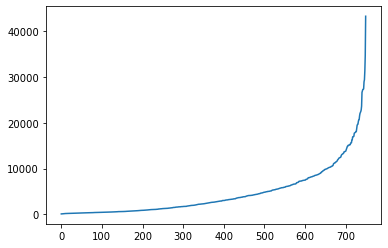

The code below uses matplotlib to create a line* chart showing the increasing income of the deciles across all of the counties. The vertical axis is the RRinc and the horizontal axis is the row number of the RRinc data in the database. Since matplotlib will connect datapoints with line segments in database  row order we have to first sort the database by RRinc, and then reset the database row indices to the new order.

(\*) *This graph is a bit misleading as a line plot because the horizontal axis should not be evenly spaced, as the deciles represent different population counts from country to country. For such cases a bar graph should be used to more properly communicate the horizontal axis represents categories and not uniformly spaced quantitative values, but because there are so many data points the individual bars would not be resolved very well, so a line graph can be used in such cases.*

Even though the horizontal axis is not a linear representation of population, this line graph does show us that higher incomes are concentrated across a small number of population deciles in a small number of countries.

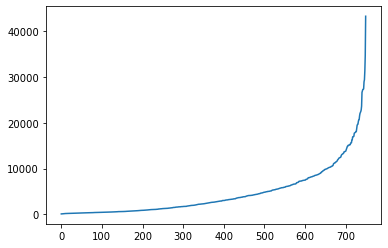

In [6]:
lm1988.sort_values('RRinc').reset_index()['RRinc'].plot()

In [7]:
"""Your result should have 750 rows"""
assert(lm1988.shape[0] == 750)

In [8]:
"""Your result should have the 'RRinc' and 'pop' fields"""
assert('pop' in lm1988.columns)
assert('RRinc' in lm1988.columns)

In [9]:
"""China for mysample = 1 should have a 1988 entry for this"""
assert(lm1988[(lm1988['RRinc'] == 157)].shape[0] == 1)
"""but should not have an entry for this mysample = 0 data"""
assert(lm1988[(lm1988['RRinc'] == 161)].shape[0] == 0)


## Step 2

Sort the lm1988 dataframe in order of increasing RRinc, and create a new calculated field called runningpop that is the cumulative total of the pop field for the current row of the table and all rows before it.

Two Pandas methods that are helpful with this are [sort_values()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) and [cumsum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumsum.html). If you already sorted the data by RRinc when visualizing the result in the previous step, then you can skip that part in this step.

In [10]:
'''Enter your solution below the YOUR CODE HERE comment,'''
'''by replacing the "raise NotImplementedError()" with your code.'''
# YOUR CODE HERE
# raise NotImplementedError()
lm1988 = lm1988.sort_values('RRinc')
lm1988['runningpop'] = lm1988['pop'].cumsum()
lm1988

,pop,RRinc,runningpop
2130,0.852521,82.0,0.852521
5360,1.648237,85.0,2.500758
4750,0.518956,87.0,3.019714
3330,0.157990,99.0,3.177704
3800,0.189233,104.0,3.366937
...,...,...,...
139,1.653220,28953.0,4109.394817
4189,0.335000,29393.0,4109.729817
1349,7.814462,31358.0,4117.544278
739,2.689500,34682.0,4120.233778


In [11]:
'''RRinc should be monotonic (sorted in non-decreasing order)'''
assert(lm1988['RRinc'].is_monotonic)

In [12]:
'''Your result should have the 'runningpop' fields'''
assert('runningpop' in lm1988.columns)
'''runningpop should be monotonic (sorted in non-decreasing order)'''
assert(lm1988['runningpop'].is_monotonic)
'''and the following test should work for any row'''
assert(lm1988.iloc[3]['runningpop'] + lm1988.iloc[4]['pop'] == lm1988.iloc[4]['runningpop'])

Your lm1988 table of 750 runningpop values (in order of non-decreasing RRinc values) should look like this image below.

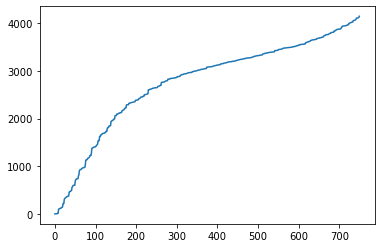

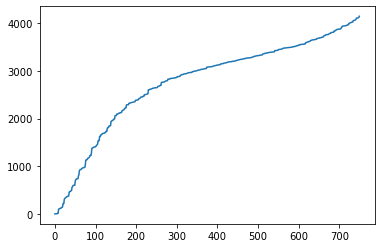

In [13]:
lm1988.sort_values('runningpop').reset_index()['runningpop'].plot()

In [14]:
'''The first thee values should match these (rounded to six decimal places)'''
assert((lm1988.iloc[0].round(6) == pd.Series({'pop': 0.852521, 'RRinc': 82,'runningpop': 0.852521})).all())
assert((lm1988.iloc[1].round(6) == pd.Series({'pop': 1.648236, 'RRinc': 85,'runningpop': 2.500758})).all())
assert((lm1988.iloc[2].round(6) == pd.Series({'pop': 0.518956, 'RRinc': 87,'runningpop': 3.019714})).all())



## Step 3

Use the Pandas cut() method to create a new field called "quintile" that contains an integer value from zero to 19 indicating which of 20 buckets each row belongs to, where each bucket represents approximately* the same population, with bucket zero holding the bottom 5% of the world population according to RRinc, and bucket 19 holding the top 5% of the world population according to RRinc.

(\*) *If we were being precise, we would divide the population in the RRinc record that crosses each quintile. For the purposes of this exercise, we're going to skip that detail. This means that each "quintile" might represent a slightly different portion of the world population that exactly 5%.*

In [15]:
'''Enter your solution below the YOUR CODE HERE comment,'''
'''by replacing the "raise NotImplementedError()" with your code.'''
# YOUR CODE HERE
# raise NotImplementedError()

lm1988['quintile'] = pd.cut( x = lm1988['runningpop'], bins = 20, labels = False )
lm1988
#lm1988.loc[lm1988['quintile'] >= 10]
#lm1988[lm1988['RRinc'] == 43279]['quintile'].values[0]

,pop,RRinc,runningpop,quintile
2130,0.852521,82.0,0.852521,0
5360,1.648237,85.0,2.500758,0
4750,0.518956,87.0,3.019714,0
3330,0.157990,99.0,3.177704,0
3800,0.189233,104.0,3.366937,0
...,...,...,...,...
139,1.653220,28953.0,4109.394817,19
4189,0.335000,29393.0,4109.729817,19
1349,7.814462,31358.0,4117.544278,19
739,2.689500,34682.0,4120.233778,19


In [16]:
'''The following RRinc records should fall into the following quintiles'''
assert(lm1988[lm1988['RRinc'] == 82]['quintile'].values[0] == 0)
assert(lm1988[lm1988['RRinc'] == 660]['quintile'].values[0] == 10)
assert(lm1988[lm1988['RRinc'] == 43279]['quintile'].values[0] == 19)

## Step 4

Use the Pandas groupby() method to create q1988 which is a 20 row dataframe grouped by 'quintile'. Each row of q1988 represents a single quintile, and has a 'RRinc' field value set to the mean of the 'RRinc' field values in lm1988 that share that 'quintile' value. Your q1988 dataframe should be ordered by quintile (0th first, 19th last).

In [17]:
'''Enter your solution below the YOUR CODE HERE comment,'''
'''by replacing the "raise NotImplementedError()" with your code.'''
# YOUR CODE HERE
# raise NotImplementedError()

q1988 = lm1988.groupby('quintile').mean()
q1988

,pop,RRinc,runningpop
quintile,,,
0,7.713393,146.650000,69.954657
1,14.808083,220.866667,324.458843
2,15.079365,267.800000,536.024458
3,21.323921,302.900000,743.265298
4,11.187583,337.600000,950.811422
5,16.587371,380.933333,1168.556027
6,14.998858,422.857143,1396.152660
7,21.585785,458.500000,1559.090420
8,8.145341,511.333333,1747.318736


In [18]:
'''The first three quintiles should have the following mean RRinc values'''
assert(q1988.at[0,'RRinc'].round(2) == 146.65)
assert(q1988.at[1,'RRinc'].round(2) == 220.87)
assert(q1988.at[2,'RRinc'].round(2) == 267.8)

## Step 5

Do the same thing to create lm2008 and q2008 for the 2008 data with mysample = 1.

In [19]:
'''Enter your solution below the YOUR CODE HERE comment,'''
'''by replacing the "raise NotImplementedError()" with your code.'''
# YOUR CODE HERE
# raise NotImplementedError()
lm2008 = lmwpid.loc[ (lmwpid["bin_year"] == 2008) & (lmwpid["mysample"] == 1), ['pop', 'RRinc']]
lm2008 = lm2008.sort_values('RRinc')
lm2008['runningpop'] = lm2008['pop'].cumsum()
lm2008['quintile'] = pd.cut( x = lm2008['runningpop'], bins = 20, labels = False )
q2008 = lm2008.groupby('quintile').mean()
q2008

,pop,RRinc,runningpop
quintile,,,
0,3.340141,177.987013,128.092164
1,8.203242,307.162791,479.160113
2,7.163367,380.081081,788.908921
3,8.944587,442.025641,1093.471821
4,9.368517,509.656250,1402.533607
5,11.169294,570.074074,1651.827953
6,7.409513,645.421053,1923.144432
7,7.503511,751.181818,2305.070956
8,6.299355,850.815789,2580.323475


In [20]:
'''The first three 2008 quintiles should have the following mean RRinc values'''
assert(q2008.at[0,'RRinc'].round(2) == 177.99)
assert(q2008.at[1,'RRinc'].round(2) == 307.16)
assert(q2008.at[2,'RRinc'].round(2) == 380.08)

## Step 6

Create a new dataframe called 'elephant' that consists of twenty rows, with each row showing for that quantile the change in RRinc in 2008 relative to RRinc in 1988.

In [21]:
'''Enter your solution below the YOUR CODE HERE comment,'''
'''by replacing the "raise NotImplementedError()" with your code.'''
# YOUR CODE HERE
# raise NotImplementedError()

# elephant = []
# for index in q2008.index:
#     q2008RRinc = q2008['RRinc'][index]
#     q1988RRinc = q1988['RRinc'][index]
#     ratio = (-q1988RRinc + q2008RRinc)/q1988RRinc
#     #print(ratio.round(3))
#     elephant.append(ratio)

# elephant = pd.Series(elephant)

elephant = ( q2008['RRinc'] - q1988['RRinc'] ) / q1988['RRinc']

elephant


quintile
0     0.213686
1     0.390716
2     0.419272
3     0.459312
4     0.509645
5     0.496519
6     0.526334
7     0.638346
8     0.663916
9     0.691206
10    0.795293
11    0.731185
12    0.594169
13    0.533766
14    0.283764
15    0.047389
16   -0.013711
17    0.070353
18    0.182532
19    0.378290
Name: RRinc, dtype: float64

In [22]:
'''The first three elephant values should be the following relative RRinc growth ratios'''
assert(elephant.at[0].round(3) == 0.214)
assert(elephant.at[1].round(3) == 0.391)
assert(elephant.at[2].round(3) == 0.419)

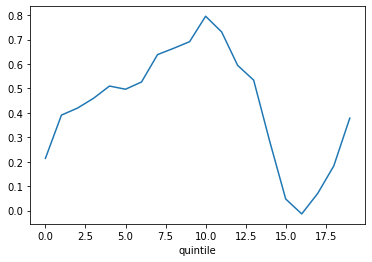

In [23]:
'''If all goes right, you should see this plot at the end'''
elephant.plot()